In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [48]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')

In [49]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [50]:
training_set=dataset_train.iloc[:,1:2].values

In [51]:
training_set.shape

(1258, 1)

In [52]:
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [9]:
X_train=[]
y_train=[]
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [53]:
X_train.shape

(1198, 60, 1)

In [54]:
y_train.shape

(1198,)

In [55]:
X_train=np.reshape(X_train,newshape=(X_train.shape[0],X_train.shape[1],1))

In [56]:
X_train.shape

(1198, 60, 1)

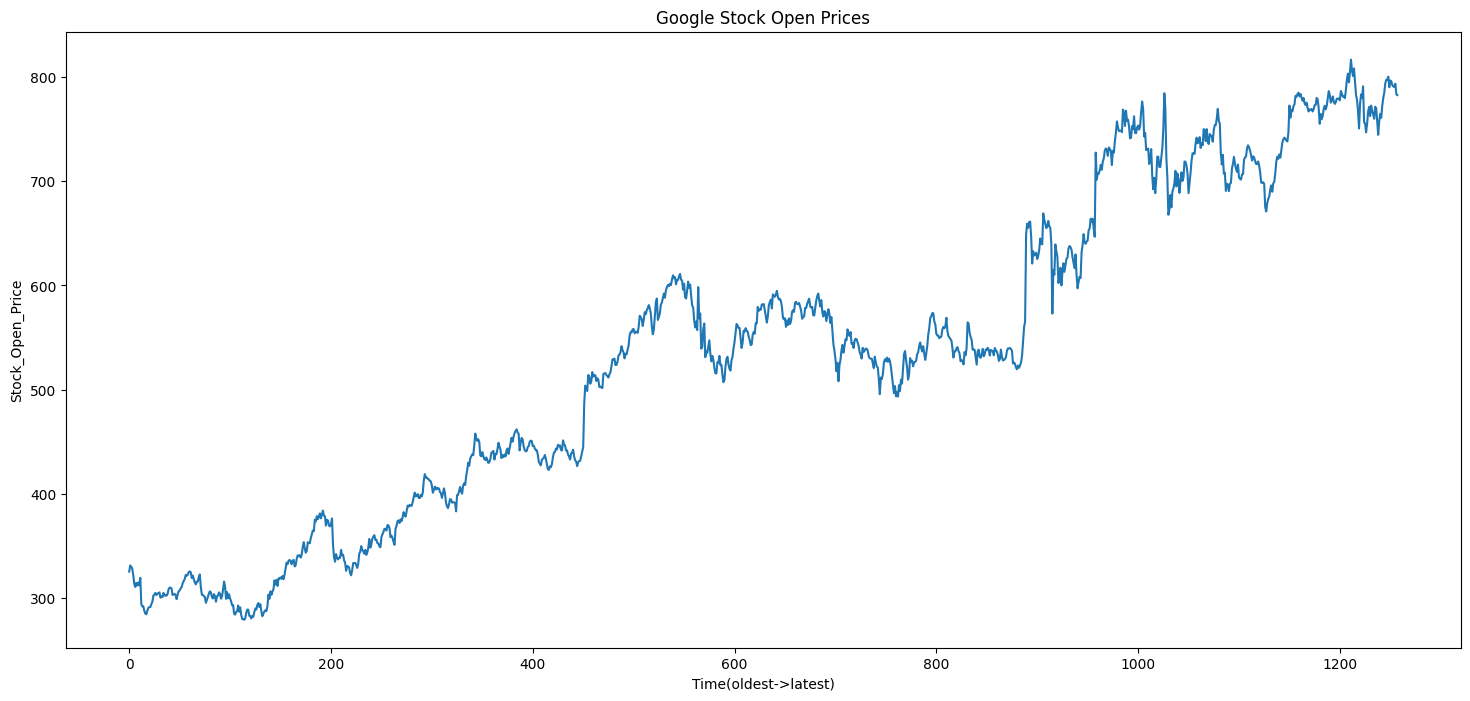

In [57]:
plt.figure(figsize=(18,8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time(oldest->latest)")
plt.ylabel("Stock_Open_Price")
plt.show()

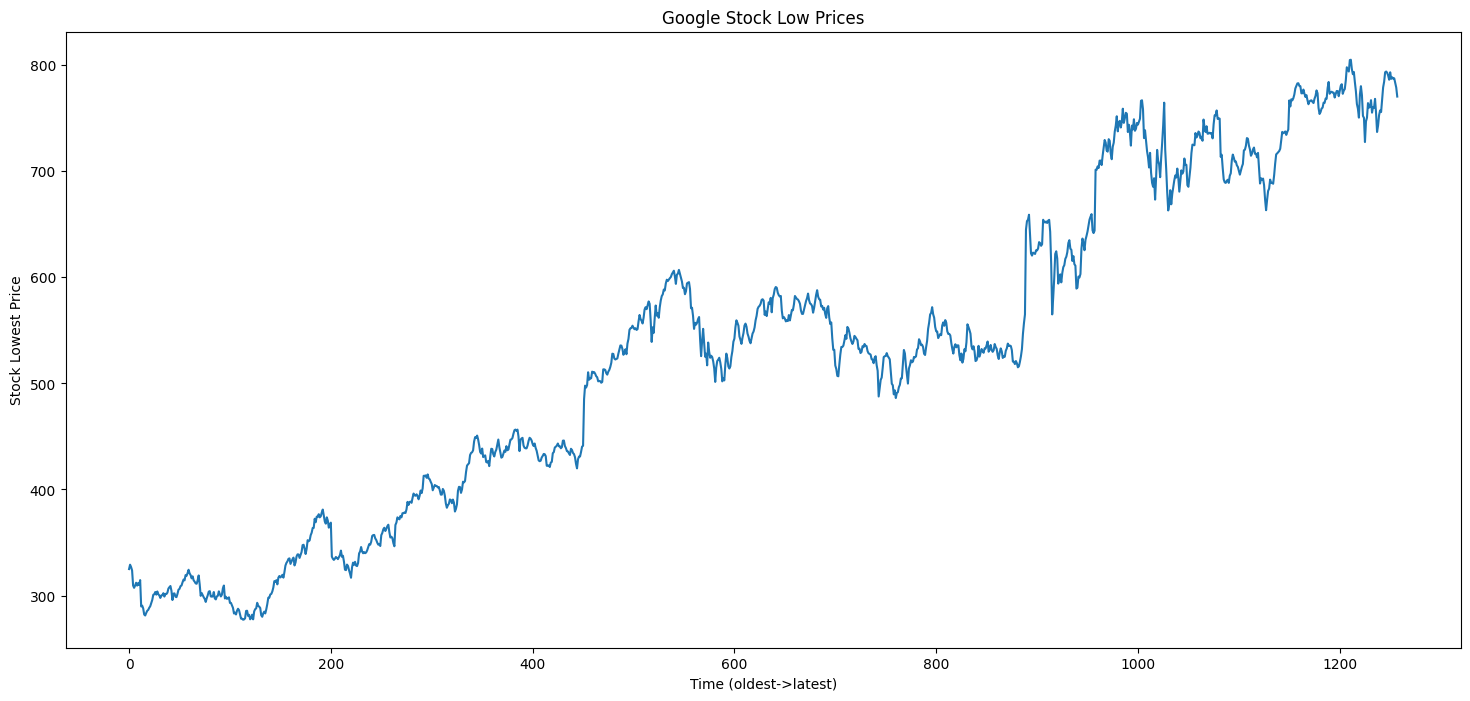

In [58]:
plt.figure(figsize=(18,8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest->latest)")
plt.ylabel("Stock Lowest Price")
plt.show()

In [59]:
regressor=Sequential()
#1st layer
regressor.add(LSTM(units=50,return_sequences=True,input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))
#2nd layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))
#3rd layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))
#4th layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))
#output layer
regressor.add(Dense(units=1))

C:\Users\Chinmayee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [61]:
regressor.fit(x=X_train,y=y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - loss: 0.1701
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0849
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.0843
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.0818
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0801
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0793
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0780
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0793
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0737
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0770
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0772
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0744
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0722
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0738
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0699
Epoch 81/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0730
Epoch 82/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0721
Epoch 83/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0773
Epoch 84/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0751
Epoch 85/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0725
Epoch 86/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0740
Epoch 87/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0747
Epoch 88/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0759
Epoch 89/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0685
Epoch 90/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0743
Epoch 91/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0772
Epoch 92/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0764
Epoch 93/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0745
Epoch 94/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 

In [62]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')

In [63]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [64]:
real_stock_price=dataset_test.iloc[:,1:2].values
real_stock_price.shape

(20, 1)

In [65]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [66]:
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [67]:
len(inputs)

80

In [68]:
X_test=[]
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [69]:
X_test.shape

(20, 60, 1)

In [70]:
predicted_stock_price=regressor.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


In [71]:
#predicted_stock_price.shape
predicted_stock_price = predicted_stock_price.reshape(-1, 1)

In [72]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [73]:
predicted_stock_price_reshaped = predicted_stock_price[:real_stock_price.shape[0]]

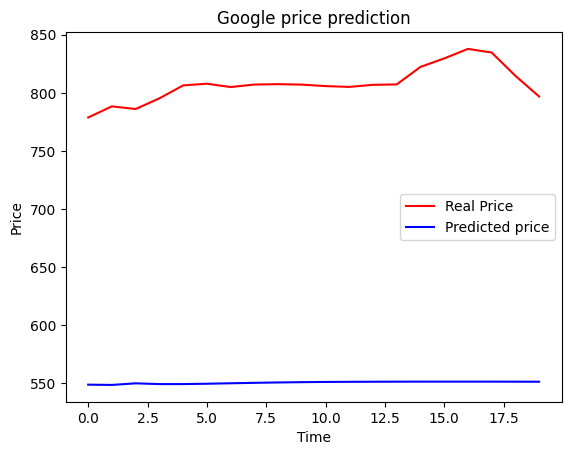

In [74]:
plt.plot(real_stock_price,color='red',label='Real Price')
plt.plot(predicted_stock_price_reshaped,color='blue',label='Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [77]:
real_stock_price.shape

(20, 1)

In [78]:
predicted_stock_price.shape

(1200, 1)